In [1]:
from __future__ import division # force floating point division

# 3rd party libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats, optimize

# set a seed for the random number generator
np.random.seed(12345)

# Classical MaxEnt (no prior distribution)

In [2]:
# Create the x's
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
x

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [3]:
# Define the objective
def obj(p):
    return -1*sp.stats.entropy(p)

In [4]:
# Interested in various values of y (the observed mean)
list = [2, 3.5, 5]
print(list)

[2, 3.5, 5]


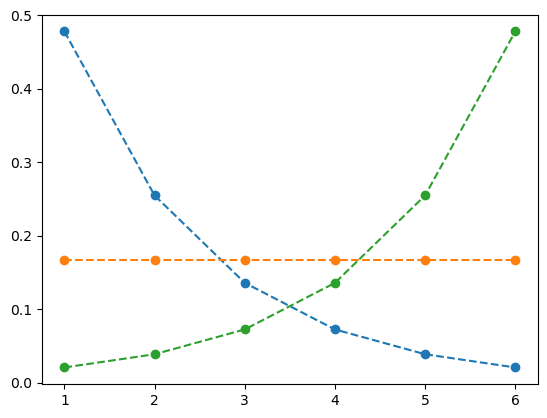

In [6]:
# Run: 
for y in list:
# constraints
    cons = ({'type': 'eq',
            'fun': lambda p: (sum(p)-1)},
           {'type': 'eq',
           'fun': lambda p: (sum([j*k for j,k in zip(x,p)])-y)})
    # optimize and save results
    results = sp.optimize.minimize(fun = obj, x0 = [1/6]*6, constraints = cons, bounds=((0,1),)*6)
    # the values of the arguments that maximize the objective are saved in results.x
    # since these are our probabilities, call this p
    p = results.x
    plt.plot(x, p, 'o--', label = 'y = {}'.format(y))
    